In [2]:
#Prerequisites
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import multivariate_normal

def GetHypo0():
    mean = (1, 1)
    cov = [[2, 0.8], [0.8, 1.0]]
    return mean, cov

def GetHypo1():
    mean = (0, -1)
    cov = [[2, 1.0], [1.0, 1.5]]
    return mean, cov

def GetRandomData(nSamp):
    #Create dummy data set 1
    mean, cov = GetHypo0()
    dat1 = np.random.multivariate_normal(mean, cov, nSamp)
    
    #Create dummy data set 2
    mean, cov = GetHypo1()
    dat2 = np.random.multivariate_normal(mean, cov, nSamp)

    return dat1, dat2

def GetHypoPDF(mean, cov):
    x, y = np.mgrid[-6:6:.01, -6:6:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(pos)
    print(z.shape)
    return z

def EvaluatePDF1(Data):
    mean, cov = GetHypo1()
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(Data)
    print(z.shape)
    return z

def EvaluatePDF0(Data):
    mean, cov = GetHypo0()
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(Data)
    print(z.shape)
    return z

def PlotRandomData(dat1, dat2):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(dat1[:,0], dat1[:,1], s=10, c='b', marker="s", label='Hypothesis 0', alpha=0.01)
    ax1.scatter(dat2[:,0], dat2[:,1], s=10, c='r', marker="o", label='Hypothesis 1', alpha=0.015)
    plt.legend(loc='upper left');
    plt.show()  

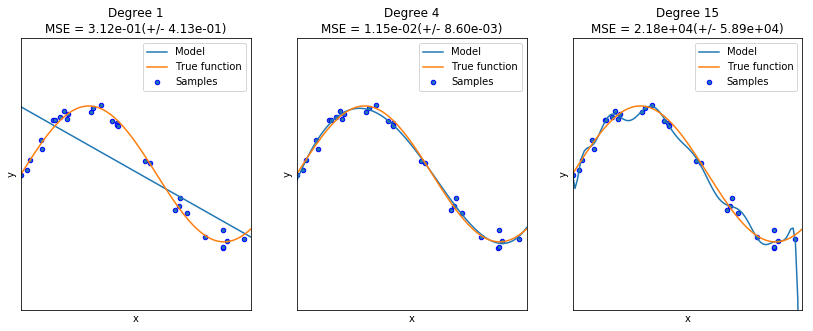

In [6]:
#Based on scikit learn example on the bias-variance tradeoff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(1.7 * np.pi * X)

np.random.seed(1)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()